In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from skfuzzy import cmeans
from models.nmf import ArchetypalAnalysis

In [3]:
import numpy as np
import torch
# create random data

X = np.random.normal(size=(1_000, 2))

n_prototypes = 4

In [4]:
# cmeans model

cmeans_results = cmeans(X.T, n_prototypes, m=2, error=1e-16, maxiter=1_000)

In [5]:
cmeans_prototypes = cmeans_results[0]
cmeans_weights = cmeans_results[1].T

In [6]:
from archetypes import AA

aa_model = AA(n_prototypes, max_iter=1_000, tol=1e-16)

_ = aa_model.fit(X)

C:\Users\aalcacer\Miniconda3\envs\ra-blosc-codecs\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
aa_prototypes = aa_model.archetypes_
aa_weights = aa_model.alphas_

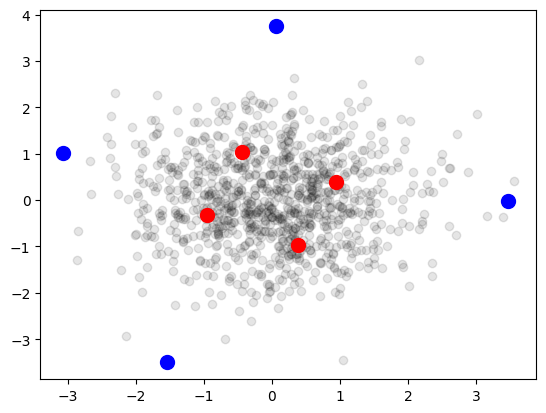

In [9]:
import matplotlib.pyplot as plt

# apply pca to plot

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
_ = pca.fit(X)

X_pca = pca.transform(X)
cmeans_prototypes_pca = pca.transform(cmeans_prototypes)
aa_prototypes_pca = pca.transform(aa_prototypes)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c='black', alpha=0.1)
plt.scatter(cmeans_prototypes_pca[:, 0], cmeans_prototypes_pca[:, 1], c='red', s=100)
plt.scatter(aa_prototypes_pca[:, 0], aa_prototypes_pca[:, 1], c='blue', s=100)
